In [1]:
import pandas as pd
pd.set_option('max_rows',200)
pd.set_option('max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
deliveries = pd.read_csv('../data/deliveries.csv')
matches = pd.read_csv('../data/matches.csv')
city = matches.groupby([matches.city,matches.venue]).venue.count().sort_values(ascending=False)
city_df = pd.DataFrame(city)
city_df.columns = ['count']
print(city_df)

                                                                   count
city           venue                                                    
Bangalore      M Chinnaswamy Stadium                                  66
Kolkata        Eden Gardens                                           61
Delhi          Feroz Shah Kotla                                       60
Mumbai         Wankhede Stadium                                       57
Hyderabad      Rajiv Gandhi International Stadium, Uppal              49
Chennai        MA Chidambaram Stadium, Chepauk                        48
Chandigarh     Punjab Cricket Association Stadium, Mohali             35
Jaipur         Sawai Mansingh Stadium                                 33
Pune           Subrata Roy Sahara Stadium                             17
Mumbai         Dr DY Patil Sports Academy                             17
Pune           Maharashtra Cricket Association Stadium                15
Durban         Kingsmead                           

In [3]:
matches.city.fillna('unknown',inplace=True)
matches.winner.fillna('draw',inplace=True)
matches.player_of_match.fillna('draw',inplace=True)

In [3]:
# batsman stats

#deliveries.groupby(deliveries.batsman).batsman_runs.sum().sort_values(ascending=False).head(15)
df_strike_rate = deliveries.groupby(['batsman']).agg({'ball':'count','batsman_runs':'mean'}).sort_values(by='batsman_runs',ascending=False)
df_strike_rate.rename(columns ={'batsman_runs' : 'strike rate'}, inplace=True)
df_runs_per_match = deliveries.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
df_total_runs = df_runs_per_match.groupby(['batsman']).agg({'sum' ,'mean','count'})
df_total_runs.rename(columns ={'sum' : 'batsman run','count' : 'match count','mean' :'average score'}, inplace=True)
df_total_runs.columns = df_total_runs.columns.droplevel()
df_sixes = deliveries[['batsman','batsman_runs']][deliveries.batsman_runs==6].groupby(['batsman']).agg({'batsman_runs':'count'})
df_four = deliveries[['batsman','batsman_runs']][deliveries.batsman_runs==4].groupby(['batsman']).agg({'batsman_runs':'count'})
df_batsman_stat = pd.merge(pd.merge(pd.merge(df_strike_rate,df_total_runs, left_index=True, right_index=True),df_sixes, left_index=True, right_index=True),df_four, left_index=True, right_index=True)
#print(df_batsman_stat)
df_batsman_stat.rename(columns = {'ball' : 'Ball', 'strike rate':'Strike Rate','batsman run' : 'Batsman Run','match count' : 'Match Count','average score' : 'Average score' ,'batsman_runs_x' :'Six','batsman_runs_y':'Four'},inplace=True)
df_batsman_stat['Strike Rate'] = df_batsman_stat['Strike Rate']*100
#df_batsman_stat.sort_values(by='Batsman Run',ascending=False).head(25)
df_runs_per_match

batsman_runs
batsman        match_id              
A Ashish Reddy 346                 10
               352                  3
               359                  8
               373                 10
               376                  4
               384                  7
               388                 14
               394                 16
               397                  4
               402                 19
               405                  7
               414                 36
               416                 14
               428                  5
               432                  3
               529                 13
               531                 15
               544                 22
               551                  6
               572                 17
               580                 32
               584                 13
               603                  2
A Chandila     373                  0
               407                  4
A Chopra       88                   2
               92                  24
               95                  13
               99                   1
               112                  2
               121                 11
A Choudhary    1                    6
               30                  15
               42                   4
A Flintoff     118                 24
               122                 22
               125                 16
A Kumble       84                   3
               94                   0
               101                  8
               107                  2
               122                  1
               124                  1
               127                  5
               139                  1
               153                  7
               174                  1
               197                  1
               209                  1
               220                  2
               226                  1
               231                  1
A Mishra       5                    8
               35                   4
               44                   9
               49                   8
               51                  13
               55                   7
               93                   4
               95                  31
               115                  2
               133                  0
               141                 11
               158                  2
               170                 13
               172                  0
               183                  3
               185                  6
               189                  0
               213                  4
               218                 10
               221                 12
               229                  4
               236                  2
               240                 12
               249                  0
               260                 25
               265                  0
               272                  2
               275                  9
               286                  0
               292                 18
               316                  0
               323                  6
               337                  1
               346                  1
               359                  8
               394                 16
               397                  1
               402                 30
               414                 15
               416                 21
               435                  6
               466                  4
               487                  0
               519                  4
               535                  1
               543                  2
               553                  1
               578                  3
...                               ...
Yuvraj Singh   193                 15
               196                 24
               201                 

In [4]:
df_batsman_stat

,Ball,Strike Rate,Batsman Run,Average score,Match Count,Six,Four
batsman,,,,,,,
Umar Gul,19,205.263158,39,9.750000,4,5,1
BCJ Cutting,70,177.142857,124,15.500000,8,10,9
AJ Tye,30,176.666667,53,17.666667,3,3,4
Shahid Afridi,46,176.086957,81,9.000000,9,6,7
SN Khan,103,171.844660,177,16.090909,11,6,19
CR Brathwaite,56,169.642857,95,11.875000,8,8,8
LJ Wright,63,168.253968,106,21.200000,5,3,16
KK Cooper,70,165.714286,116,9.666667,12,8,9
Kamran Akmal,78,164.102564,128,21.333333,6,8,13


In [5]:
# 50 to 100
ds = df_runs_per_match[df_runs_per_match["batsman_runs"] > 50]
ds2 = ds[df_runs_per_match["batsman_runs"] < 100]
dsAgg50 = ds2.groupby(['batsman']).agg({'count'})
dsAgg50

/Users/alva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,batsman_runs
,count
batsman,
A Symonds,4
AA Jhunjhunwala,1
AB de Villiers,20
AC Blizzard,1
AC Gilchrist,10
AD Mathews,1
AD Russell,3
AJ Finch,11


In [6]:
# > 100
ds = df_runs_per_match[df_runs_per_match["batsman_runs"] > 100]
dsAgg100 = ds.groupby(['batsman']).agg({'count'})
dsAgg100

,batsman_runs
,count
batsman,
A Symonds,1
AB de Villiers,3
AC Gilchrist,2
AM Rahane,1
BA Stokes,1
BB McCullum,1
CH Gayle,5
DA Miller,1


In [7]:
# merge pandas
# df_runs_per_match (full)
# dsAgg
df_merged = pd.merge(df_batsman_stat,dsAgg50, on = "batsman") #left_index=True, right_index=True)
df_merged_tot = pd.merge(df_merged,dsAgg100, on = "batsman")
# df_merged_tot.rename(columns ={"('batsman_runs', 'count')_x" : '50s', "(batsman_runs_y, count)" : '100s'}, inplace=True)
#df_merged_tot.columns
df_merged_tot.columns = [                       'Ball',                 'Strike Rate',
                     'Average score',                 'Batsman Run',
                       'Match Count',                         'Six',
                              'Four', '50s',
         '100s']
df_merged_tot
# df_merged_tot

/Users/alva/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,Ball,Strike Rate,Average score,Batsman Run,Match Count,Six,Four,50s,100s
batsman,,,,,,,,,
V Sehwag,1833,148.827059,2728,26.230769,104,106,334,15,2
AB de Villiers,2402,145.129059,3486,29.542373,118,158,287,20,3
CH Gayle,2532,144.194313,3651,36.510000,100,266,297,22,5
DA Warner,2902,138.318401,4014,35.210526,114,160,401,36,3
HM Amla,418,138.038278,577,36.062500,16,21,60,3,2
DA Miller,1135,137.709251,1563,24.421875,64,78,104,8,1
SR Watson,1949,134.838379,2628,26.816327,98,122,258,13,2
ST Jayasuriya,573,134.031414,768,25.600000,30,39,84,4,1
AC Gilchrist,1555,133.054662,2069,25.862500,80,92,239,10,2


In [10]:
df_merged_tot.count()

Ball             25
Strike Rate      25
Average score    25
Batsman Run      25
Match Count      25
Six              25
Four             25
50s              25
100s             25
dtype: int64

In [8]:
condition = (deliveries.dismissal_kind.notnull()) &(deliveries.dismissal_kind != 'run out')&(deliveries.dismissal_kind != 'retired hurt')
condition_fielding = (deliveries.dismissal_kind == 'caught') | (deliveries.dismissal_kind == 'run out')
df_bowlers = deliveries.loc[condition,:].groupby(deliveries.bowler).dismissal_kind.count().sort_values(ascending=False)
df_runs_match = deliveries.groupby(['bowler','match_id']).agg({'total_runs':'sum','ball':'count',})
#df_runs_matchs = df_runs_match.columns.droplevel()
#df_bowlers.head(15)
df_runs_match.total_runs = df_runs_match.total_runs
df_runs_match['run_Rate'] = df_runs_match.total_runs/df_runs_match.ball*6
#df_runRate = df_runRate.groupby(['bowler']).agg({'run_Rate':'sum'})

#df_runs_match.sort_values(by='total_runs',ascending=True)
df_runRate = df_runs_match.run_Rate.groupby(['bowler']).agg({'mean'})
df_bowlers = pd.merge(df_bowlers.to_frame(),df_runRate , how='inner', left_index=True, right_index=True)
df_bowlers.rename({'mean':'Run Rate'}, axis=1, inplace=True)
df_bowlers





,dismissal_kind,Run Rate
bowler,,
SL Malinga,154,6.709869
A Mishra,134,7.552957
Harbhajan Singh,127,7.080224
PP Chawla,126,8.153603
DJ Bravo,122,7.998479
B Kumar,111,7.147331
A Nehra,106,7.698916
R Vinay Kumar,103,8.245581
Z Khan,102,7.490408


In [ ]:
# visualization

In [11]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [27]:
# replace title

matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

ModuleNotFoundError: No module named 'plotly'

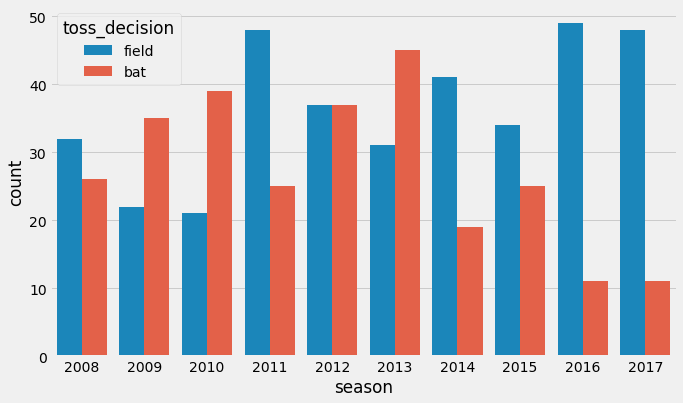

In [13]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
mlt.show()

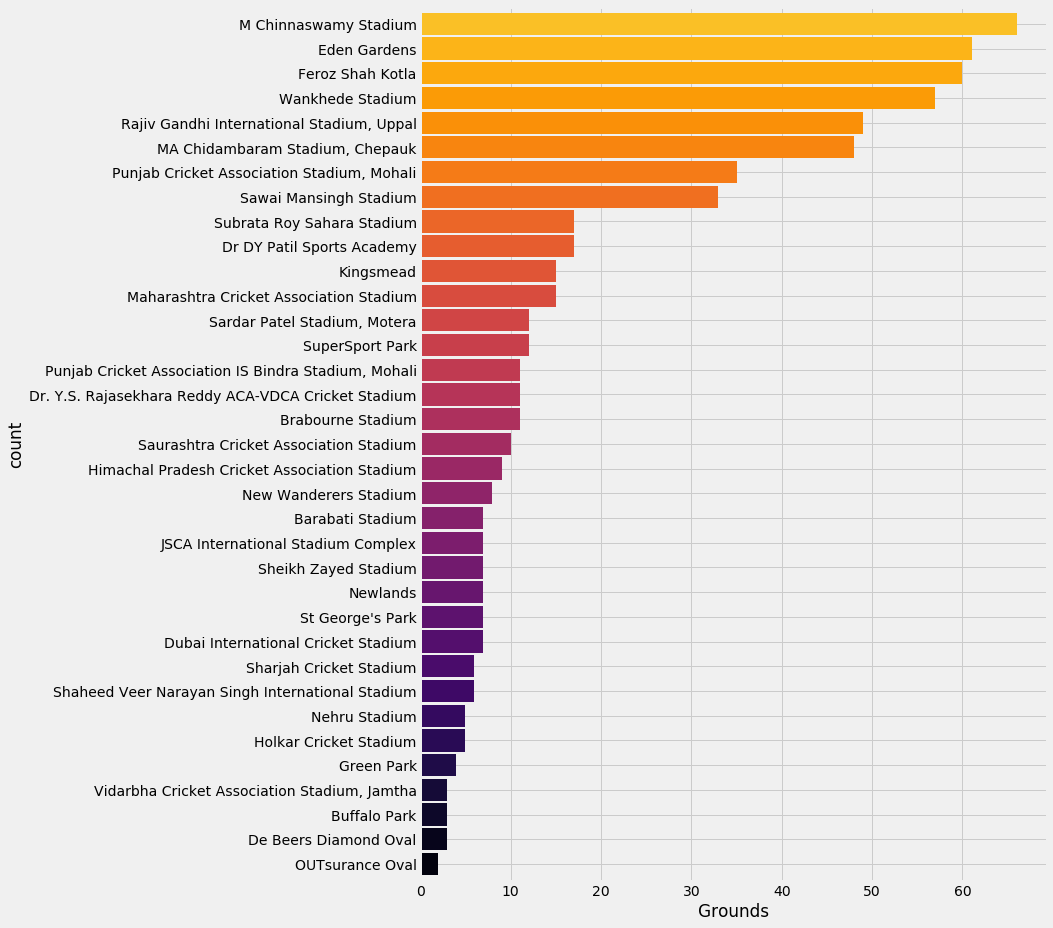

In [15]:
mlt.subplots(figsize=(10,15))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
mlt.show()

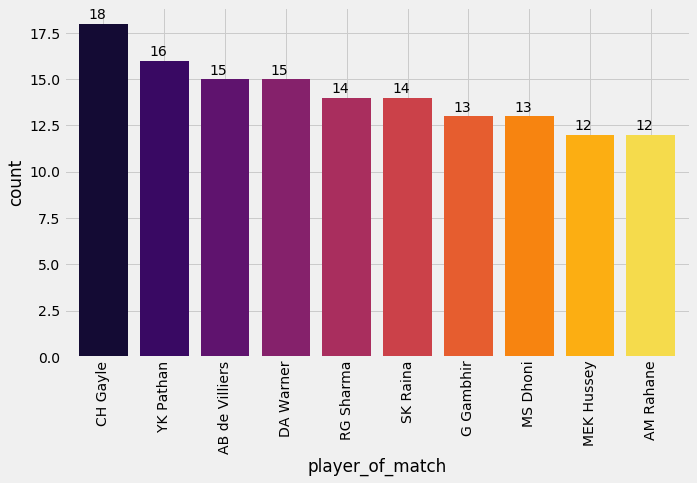

In [16]:
mlt.subplots(figsize=(10,6))
#the code used is very basic but gets the job done easily
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()



In [22]:
# team comparison


def team1_vs_team2(team1,team2):
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
    sns.countplot(x='season',data=mt1, hue='winner',palette='Set3')
    mlt.xticks(rotation='vertical')
    leg = mlt.legend( loc = 'upper center')
    fig=mlt.gcf()
    fig.set_size_inches(10,6)
    mlt.show()
team1_vs_team2('KKR','MI')

ValueError: min() arg is an empty sequence

In [23]:
team1_vs_team2('CSK','MI')

ValueError: min() arg is an empty sequence

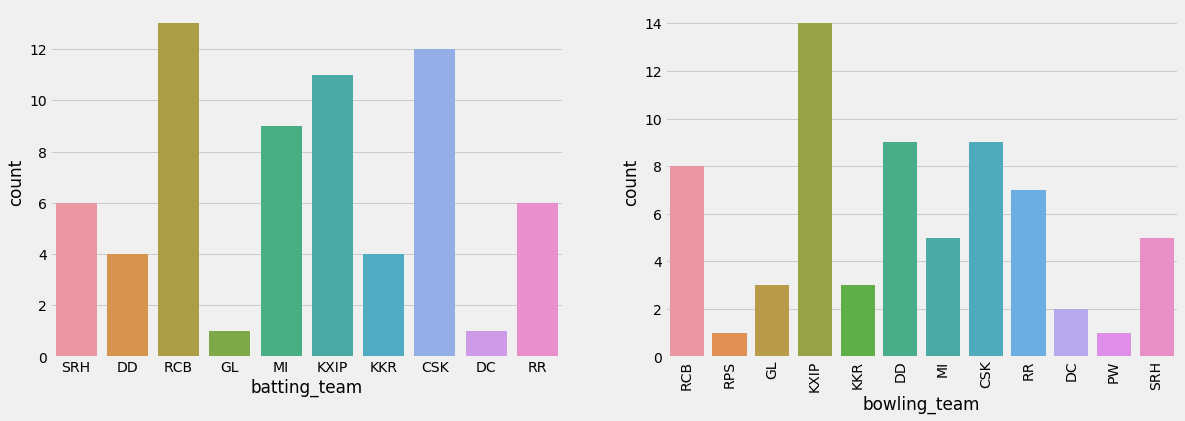

In [28]:

high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')
fig, ax =mlt.subplots(1,2)
sns.countplot(high_scores['batting_team'],ax=ax[0])
sns.countplot(high_scores['bowling_team'],ax=ax[1])
mlt.xticks(rotation=90)
fig=mlt.gcf()
fig.set_size_inches(18,6)
mlt.show()

In [31]:
delivery = deliveries

In [32]:
balls=delivery.groupby(['batsman'])['ball'].count().reset_index()
runs=delivery.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=delivery.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=delivery.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
balls['strike_rate']=balls['ball_y']/balls['ball_x']*100
balls=balls.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
balls=balls.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman','batting_team'])['batsman_runs'].max().reset_index()
balls=balls.merge(compare,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batting_team':'Team','batsman_runs':'Highest_score'},axis=1,inplace=True)

/Users/alva/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


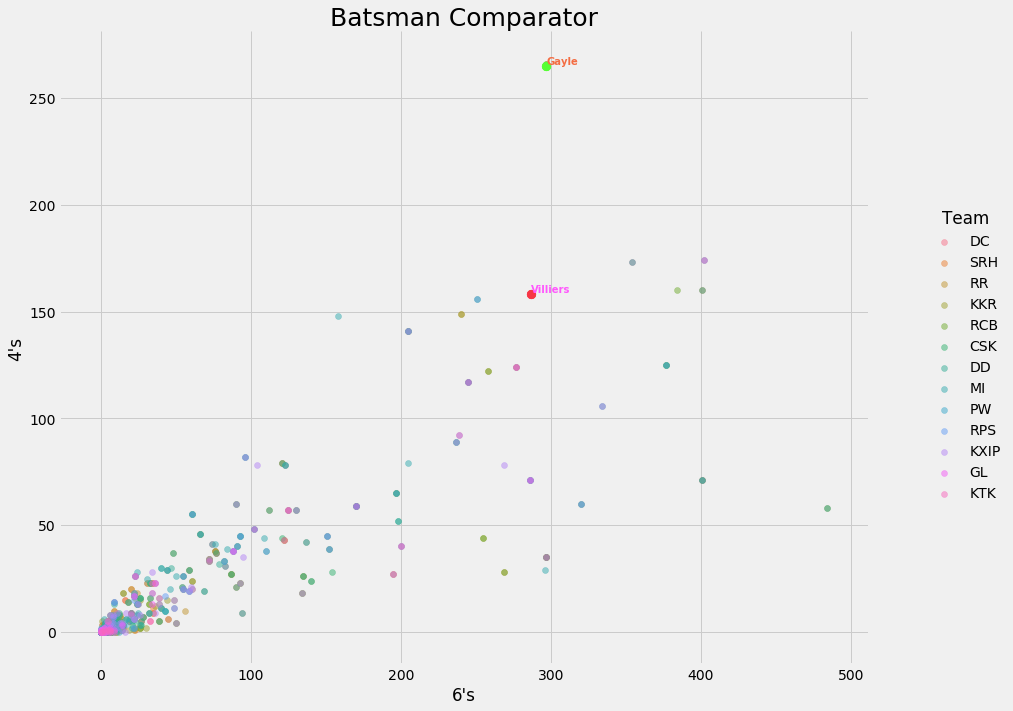

In [33]:
# batsman comp

def batsman_comparator(stat1,stat2,batsman1,batsman2):
    sns.FacetGrid(balls,hue='Team',size=8).map(mlt.scatter, stat1,stat2, alpha=0.5).add_legend()
    bats1=balls[balls['batsman'].str.contains(batsman1)].sort_values(by=stat1,ascending=False)
    bats2=balls[balls['batsman'].str.contains(batsman2)].sort_values(by=stat1,ascending=False)
    mlt.scatter(bats1[stat1],bats1[stat2]-1,s=75,c='#55ff33')
    mlt.text(x=bats1[stat1].values[0],y=bats1[stat2].values[0],s=batsman1,
            fontsize=10, weight='bold', color='#f46d43')
    mlt.scatter(bats2[stat1],bats2[stat2],s=75,c='#f73545')
    mlt.text(x=bats2[stat1].values[0],y=bats2[stat2].values[0]+1,s=batsman2, 
            fontsize=10, weight='bold', color='#ff58fd')
    mlt.gcf().set_size_inches(15,10)
    mlt.title('Batsman Comparator',size=25)
    mlt.show()

batsman_comparator("6's","4's",'Gayle','Villiers') #comparing gayle and de-villiers based on their respective boundaries

/Users/alva/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


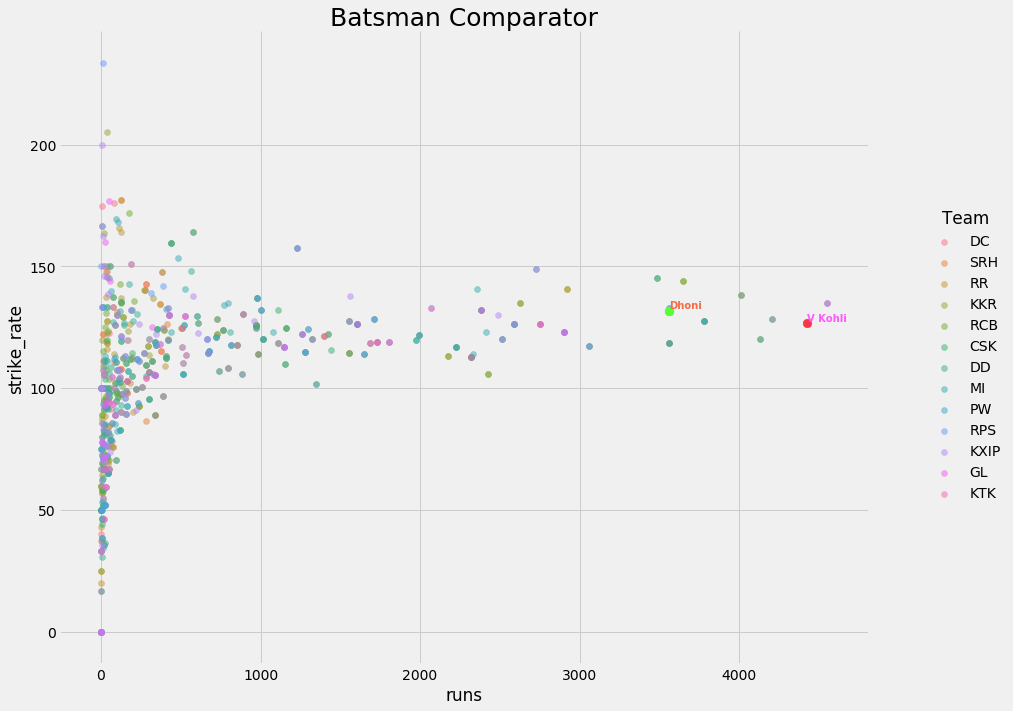

In [34]:
batsman_comparator("runs","strike_rate",'Dhoni','V Kohli')

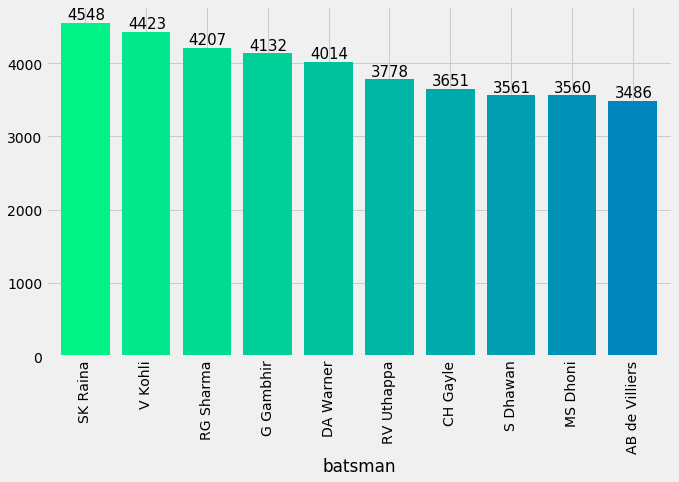

In [35]:
# top 10 batsman
mlt.subplots(figsize=(10,6))
max_runs=delivery.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
mlt.show()

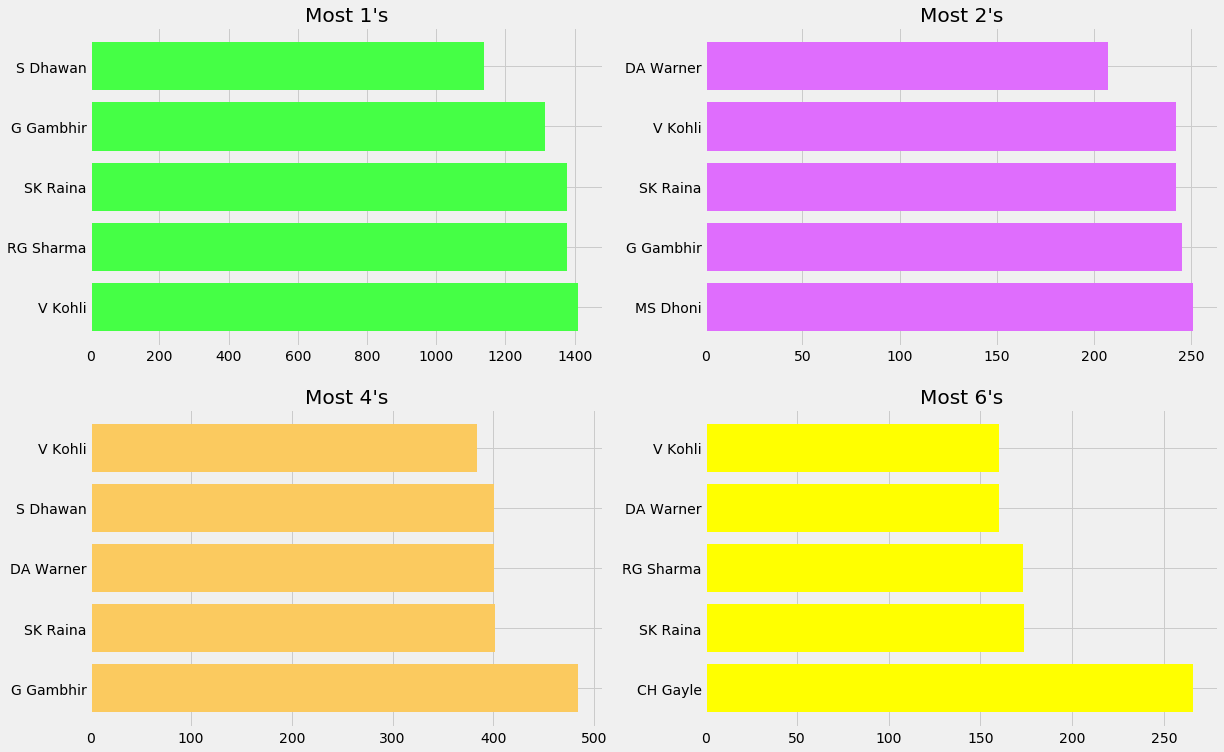

In [36]:
toppers=delivery.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=mlt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
mlt.show()

In [37]:
top_scores = delivery.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


In [11]:
    %%HTML

<div class='tableauPlaceholder' id='viz1512062244547' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;IP&#47;IPLDashboard_0&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='IPLDashboard_0&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;IP&#47;IPLDashboard_0&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1512062244547');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1520px';vizElement.style.height='1787px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.